In [1]:
import matplotlib.pyplot as plt

import pickle
import numpy as np

In [2]:
with open('sensitive_analysis_2G_100.pkl','r') as inputs:
    data = pickle.load(inputs)

with open('sensitive_analysis_base_renewal.pkl','r') as inputsbase:
    data_base = pickle.load(inputsbase)

In [3]:
c_list= list()
g_list =list()
for item in data:
    c_list.append(item[1][0])
    g_list.append(item[1][1])
    

In [4]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [6]:
def get_price_stat_ave(data,decision_times): #period average for each sample
    mitigation = []
    utility = []
    price = []
    a650 = []
    from tree import TreeModel 
    for i in range(len(data)): #load corresponding results
        mitigation.append(data[i][-3])
        utility.append(data[i][-2])
        price.append(data[i][-1])
        #a650.append(data[i][2])
    #print(np.mean(a650))
    
    t = TreeModel(decision_times)
    nodes_index = []
    for i in range(t.num_periods):
        nodes_index.append(t.get_nodes_in_period(i)) #get nodes for slicing
    price_stat_ave = np.zeros((len(data), t.num_periods))
    for i in range(len(data)):
        for j in range(t.num_periods):
            price_stat_ave[i,j] = np.average(data[i][-1][nodes_index[j][0]:nodes_index[j][1]+1])
    return price_stat_ave

def get_90_quantile(price_stat_ave):
    list0 = price_stat_ave[:,0]
    list1 = price_stat_ave[:,1]
    list2 = price_stat_ave[:,2]
    list3 = price_stat_ave[:,3]
    list4 = price_stat_ave[:,4]
    list5 = price_stat_ave[:,5]
    list_ = [list0,list1,list2,list3,list4,list5]
    fivepercent = int(len(list0)*0.05)
    for i in range(len(list_)):
        list_[i]=np.sort(list_[i])[fivepercent:-fivepercent] #take the 90% of the sorted results
    list_min = []
    list_max = []
    for i in list_:
        list_min.append(i[0])
        list_max.append(i[-1])   
    return list_min,list_max #take the lower and upper bounds for the test results

In [10]:
decision_times=[0, 15, 45, 85, 185, 285, 385]
price_stat_ave = get_price_stat_ave(data,decision_times)
ziped_list = zip(c_list,g_list,price_stat_ave[:,0])
ziped_list.sort(key = lambda t: t[2])
target_list = ziped_list[5:95]
target_list_ori = zip(*target_list)

In [12]:
dx = ax.scatter(target_list_ori[0], target_list_ori[1],target_list_ori[2])

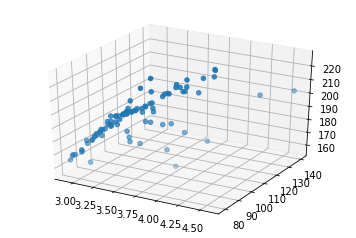

In [13]:
plt.show()